参考Website:   https://www.cuijiahua.com/

# 回归预测

前面的章节介绍了很多分类算法，分类的目标变量是标称型数据。本章将对连续型的数据做出预测。主要讲解简单的线性回归和局部加权线性回归，以及将树构建的一些思想应用到回归中。

# 用线性回归找到最佳拟合直线
## 线性回归求解
**“多元线性回归”**中，输入$x$是$d$维的，模型试图学得$$f(x_i)=w^Tx_i+b，使得f(x_i)\approx y_i$$
为求解w和b，将b视为$w_{d+1}$，模型转化为$f(x)=w^Tx$，w和x都是一个$d+1$维的列向量。如下：

$$X=\left\lgroup \matrix{
x_{11}& x_{12} & \dots & x_{1d} & 1 \cr 
x_{21} & x_{22} & \dots & x_{2d} & 1 \cr 
\dots \dots \cr 
x_{m1}&x_{m2}&\dots & x_{md} & 1 
}\right\rgroup$$

$$w=\left\lgroup \matrix{
w_1 \cr 
w_2\cr 
\dots \cr 
w_d \cr
b
}\right\rgroup$$

X的每列为输入的一个样本，每个样本对应的标签$y_i$也是已知的。目的要找到$w$。

常用的方法就是找出使误差最小的w。这里的误差是指预测值和真实值之间的差值，使用该误差的简单累加将使得正差值和负差值相互抵消，所以我们采用平方误差。
平方误差可以写为：$$\sum_{i=1}^m(y_i-x_i^Tw)^2$$
用矩阵可以写成$$(y-Xw)^T(y-Xw)$$类似于一维输入的情况，目标为$$\hat {w}^*=\underset{<\hat w>}{\operatorname{argmin}}{E_{\hat w}}=\underset{<\hat w>}{\operatorname{argmin}}(y-X\hat w)^T(y-X\hat w)$$ 
一般认为平方误差和越小，说明线性回归拟合效果越好。$\hat {w}$就是希望得到的参数值。

求${E_\hat w}$对$\hat w$的导数，（注意$(Xw)^T=w^TX)$得 $$\frac {\partial {E_ w}}{\partial w}=
\frac {\partial (y^T-w^TX^T)(y-Xw)} { \partial w}$$


$$=\frac {\partial {(y^Ty-y^TXw-w^TX^Ty+w^TX^TXw)}}{\partial w}$$写成四个部分求导的形式（累加后求导=求导后累加）

上式求导$$=0-X^Ty-X^Ty+2x^Txw
=-2X^T(y-Xw)$$

令上式为零，当$X^TX$维满秩矩阵或者正定矩阵，可得$$\hat {w}^*=(X^TX)^{-1}X^Ty$$
参考图如下：![jupyter](./img/reg-1.png)

w上方的小标记表示，这是当前可以估计出的w的最优解。从现有数据上估计出的w可能并不是数据中的真实w值，所以这里使用了一个"帽"符号来表示它仅是w的一个**最佳估计**。

值得注意的是，上述公式中包含逆矩阵，也就是说，这个方程只在逆矩阵存在的时候使用，也即是这个矩阵是一个方阵，并且其行列式不为0。

述的最佳w求解是统计学中的常见问题，除了矩阵方法外还有很多其他方法可以解决。通过调用NumPy库里的矩阵方法，我们可以仅使用几行代码就完成所需功能。该方法也称作OLS， 意思是“普通小二乘法”（ordinary least squares）。

令$\hat x_i=(x_i,1)$，**最终学得的多元回归模型**为$$f(\hat x_i)=\hat x_i^T(X^TX)^{-1}X^Ty$$然而，现实任务中， $X^TX$往往并不是满秩矩阵，X的列数多于行数。此时可以求出多个$\hat w$,选择一个作为输出。

在线性回归这个简单例⼦⾥，令损失函数对模型参数求导后的结果为零可以解出最小化损失函数的模型参数。这类解叫做**解析解**（analytical solution）。然而，⼤多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫做**数值解**（numerical solution）。

## 代码实现
数据集中，第一列都为1.0，即x0。第二列为x1，即x轴数据。第三列为x2，即y轴数据。首先绘制下数据，看下数据分布。编写代码如下：

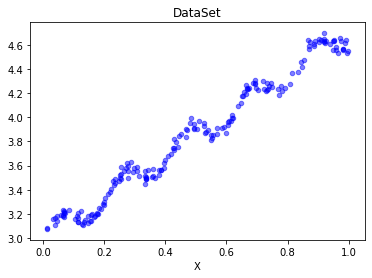

In [1]:
# -*- coding:utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
 
def loadDataSet(fileName):
    """
    函数说明:加载数据
    Parameters:
        fileName - 文件名
    Returns:
        xArr - x数据集
        yArr - y数据集
    """
 
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr
 
def plotDataSet():
    """
    函数说明:绘制数据集
    Parameters:
        无
    Returns:
        无
    """
    xArr, yArr = loadDataSet('ex0.txt')                                    #加载数据集
    n = len(xArr)                                                        #数据个数
    xcord = []; ycord = []                                                #样本点
    for i in range(n):                                                   
        xcord.append(xArr[i][1]); ycord.append(yArr[i])                    #样本点
    #print(ycord)
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord, ycord, s = 20, c = 'blue',alpha = .5)                #绘制样本点
    plt.title('DataSet')                                                #绘制title
    plt.xlabel('X')
    plt.show()
 
if __name__ == '__main__':
    plotDataSet()

通过可视化数据，我们可以看到数据的分布情况。接下来，让我们根据上文中推导的回归系数计算方法，求出回归系数向量，并根据回归系数向量绘制回归曲线，编写代码如下：

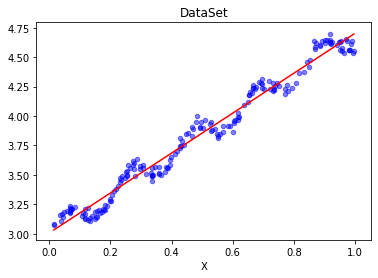

In [2]:
# -*- coding:utf-8 -*-

def standRegres(xArr,yArr):
    """
    函数说明:计算回归系数w
    Parameters:
        xArr - x数据集
        yArr - y数据集
    Returns:
        ws - 回归系数
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T * xMat                            #根据文中推导的公示计算回归系数
    #print(xMat.shape,xArr)
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws
 
def plotRegression():
    """
    函数说明:绘制回归曲线和数据点
    Parameters:
        无
    Returns:
        无
    """
    xArr, yArr = loadDataSet('ex0.txt')                                    #加载数据集
    ws = standRegres(xArr, yArr)                                        #计算回归系数
    xMat = np.mat(xArr)                                                    #创建xMat矩阵
    yMat = np.mat(yArr)                                                    #创建yMat矩阵
    xCopy = xMat.copy()                                                    #深拷贝xMat矩阵
    xCopy.sort(0)                                                        #排序
    yHat = xCopy * ws                                                     #计算对应的y值
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.plot(xCopy[:, 1], yHat, c = 'red')                                #绘制回归曲线
    ax.scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue',alpha = .5)                #绘制样本点
    plt.title('DataSet')                                                #绘制title
    plt.xlabel('X')
    plt.show()
 
if __name__ == '__main__':
    plotRegression()

**如何判断拟合曲线的拟合效果的如何呢？**当然，我们可以根据自己的经验进行观察，除此之外，我们还可以使用**corrcoef方法**，来比较预测值和真实值的相关性。编写代码如下：

In [3]:
if __name__ == '__main__':
    xArr, yArr = loadDataSet('ex0.txt')                                    #加载数据集
    ws = standRegres(xArr, yArr)                                        #计算回归系数
    xMat = np.mat(xArr)                                                    #创建xMat矩阵
    yMat = np.mat(yArr)                                                    #创建yMat矩阵
    yHat = xMat * ws
    print(np.corrcoef(yHat.T, yMat))

[[1.         0.98647356]
 [0.98647356 1.        ]]


可以看到，对角线上的数据是1.0，因为yMat和自己的匹配是完美的，而YHat和yMat的相关系数为0.98。

最佳拟合直线方法将数据视为直线进行建模，具有十分不错的表现。数据当中#**似乎还存在其他的潜在模式**。那么如何才能利用这些模式呢？我们可以根据数据来局部调整预测，下面就会介绍这种方法。

## 局部加权线性回归
线性回归的一个问题是有可能出现**欠拟合现象**，因为它求的是具有小均方误差的无偏估计。显而易见，如果模型欠拟合将不能取得好的预测效果。所以有些方法允许在估计中**引入一 些偏差**，从而降低预测的均方误差。

其中的一个方法是**局部加权线性回归（Locally Weighted Linear Regression，LWLR）**。在该方法中，我们给待预测点附近的每个点赋予一定的权重。与kNN一样，这种算法每次预测均需要事先选取出对应的数据子集。该算法解出回归系数W的形式如下：$$\hat w=(X^TwX)^{-1}X^Twy$$

其中w是一个矩阵，这个公式跟我们上面推导的公式的区别就在于w，它用来给每个点赋予权重。
**LWLR使用"核"（与支持向量机中的核类似）来对附近的点赋予更高的权重**。核的类型可以自由选择，最常用的核就是**高斯核**，高斯核对应的权重如下：$$w(i,j)=exp\left (\frac{|x^{(i)-x}|^2}{-2k^2}\right)$$

这样我们就可以根据上述公式，编写局部加权线性回归，我们通过**改变k的值，可以调节回归效果**，编写代码如下：

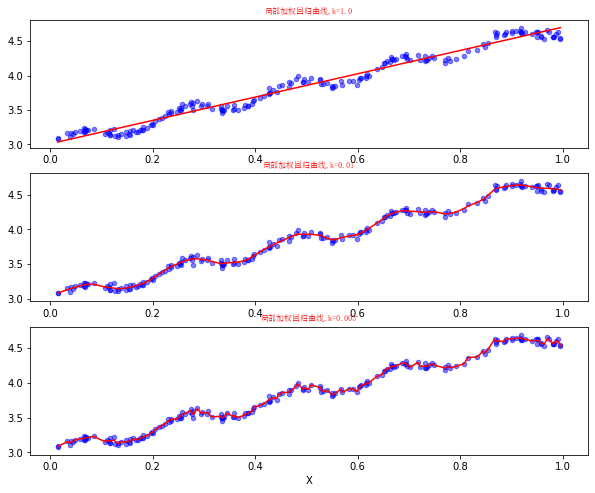

In [4]:
# -*- coding:utf-8 -*-
from matplotlib.font_manager import FontProperties

 
def plotlwlrRegression():
    """
    函数说明:绘制多条局部加权回归曲线
    Parameters:
        无
    Returns:
        无
    """
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    xArr, yArr = loadDataSet('ex0.txt')                                    #加载数据集
    yHat_1 = lwlrTest(xArr, xArr, yArr, 1.0)                            #根据局部加权线性回归计算yHat
    yHat_2 = lwlrTest(xArr, xArr, yArr, 0.01)                            #根据局部加权线性回归计算yHat
    yHat_3 = lwlrTest(xArr, xArr, yArr, 0.003)                            #根据局部加权线性回归计算yHat
    xMat = np.mat(xArr)                                                    #创建xMat矩阵
    yMat = np.mat(yArr)                                                    #创建yMat矩阵
    srtInd = xMat[:, 1].argsort(0)                                        #排序，返回索引值
    xSort = xMat[srtInd][:,0,:]
    fig, axs = plt.subplots(nrows=3, ncols=1,sharex=False, sharey=False, figsize=(10,8))                                        
    axs[0].plot(xSort[:, 1], yHat_1[srtInd], c = 'red')                        #绘制回归曲线
    axs[1].plot(xSort[:, 1], yHat_2[srtInd], c = 'red')                        #绘制回归曲线
    axs[2].plot(xSort[:, 1], yHat_3[srtInd], c = 'red')                        #绘制回归曲线
    axs[0].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[1].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[2].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0].set_title(u'局部加权回归曲线,k=1.0',FontProperties=font)
    axs1_title_text = axs[1].set_title(u'局部加权回归曲线,k=0.01',FontProperties=font)
    axs2_title_text = axs[2].set_title(u'局部加权回归曲线,k=0.003',FontProperties=font)
    plt.setp(axs0_title_text, size=8, weight='bold', color='red')  
    plt.setp(axs1_title_text, size=8, weight='bold', color='red')  
    plt.setp(axs2_title_text, size=8, weight='bold', color='red')  
    plt.xlabel('X')
    plt.show()
def lwlr(testPoint, xArr, yArr, k = 1.0):
    """
    函数说明:使用局部加权线性回归计算回归系数w
    Parameters:
        testPoint - 测试样本点
        xArr - x数据集
        yArr - y数据集
        k - 高斯核的k,自定义参数
    Returns:
        ws - 回归系数
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))                  #创建权重对角矩阵
    for j in range(m):                             #遍历数据集计算每个样本的权重
        diffMat = testPoint - xMat[j, :]                                 
        weights[j, j] = np.exp(diffMat * diffMat.T/(-2.0 * k**2))
    xTx = xMat.T * (weights * xMat)                                        
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))                            #计算回归系数
    return testPoint * ws
def lwlrTest(testArr, xArr, yArr, k=1.0):  
    """
    函数说明:局部加权线性回归测试
    Parameters:
        testArr - 测试数据集
        xArr - x数据集
        yArr - y数据集
        k - 高斯核的k,自定义参数
    Returns:
        ws - 回归系数
    """
    m = np.shape(testArr)[0]                                            #计算测试数据集大小
    yHat = np.zeros(m)    
    for i in range(m):                                                    #对每个样本点进行预测
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat
if __name__ == '__main__':
    plotlwlrRegression()

可以看到，当k越小，拟合效果越好。但是当k过小，会出现过拟合的情况，例如k等于0.003的时候。

## 预测鲍鱼的年龄
接下来，我们将回归用于真是数据。在abalone.txt文件中记录了鲍鱼的年龄，这个数据来自UCI数据集合的数据。鲍鱼年龄可以从鲍鱼壳的层数推算得到。

可以看到，数据集是多维的，所以我们很难画出它的分布情况。每个维度数据的代表的含义没有给出，不过没有关系，我们只要知道**最后一列的数据是y值就可以了**，最后一列代表的是鲍鱼的真实年龄，前面几列的数据是一些鲍鱼的特征，例如鲍鱼壳的层数等。我们不做数据清理，直接用上所有特征，测试下我们的局部加权回归。

添加rssError函数，用于评价最后回归结果。编写代码如下：

In [5]:
# -*- coding:utf-8 -*-
from matplotlib.font_manager import FontProperties

def lwlr(testPoint, xArr, yArr, k = 1.0):
    """
    函数说明:使用局部加权线性回归计算回归系数w
    Parameters:
        testPoint - 测试样本点
        xArr - x数据集
        yArr - y数据集
        k - 高斯核的k,自定义参数
    Returns:
        ws - 回归系数
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))                                        #创建权重对角矩阵
    for j in range(m):                                                  #遍历数据集计算每个样本的权重
        diffMat = testPoint - xMat[j, :]                                 
        weights[j, j] = np.exp(diffMat * diffMat.T/(-2.0 * k**2))
    xTx = xMat.T * (weights * xMat)                                        
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))                            #计算回归系数
    return testPoint * ws
def lwlrTest(testArr, xArr, yArr, k=1.0):  
    """
    函数说明:局部加权线性回归测试
    Parameters:
        testArr - 测试数据集,测试集
        xArr - x数据集,训练集
        yArr - y数据集,训练集
        k - 高斯核的k,自定义参数
    Returns:
        ws - 回归系数
    """
    m = np.shape(testArr)[0]                                            #计算测试数据集大小
    yHat = np.zeros(m)    
    for i in range(m):                                                    #对每个样本点进行预测
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat
def standRegres(xArr,yArr):
    """
    函数说明:计算回归系数w
    Parameters:
        xArr - x数据集
        yArr - y数据集
    Returns:
        ws - 回归系数
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T * xMat                            #根据文中推导的公示计算回归系数
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws
def rssError(yArr, yHatArr):
    """
    误差大小评价函数
    Parameters:
        yArr - 真实数据
        yHatArr - 预测数据
    Returns:
        误差大小
    """
    return ((yArr - yHatArr) **2).sum()
if __name__ == '__main__':
    abX, abY = loadDataSet('abalone.txt')
    print('训练集与测试集相同:局部加权线性回归,核k的大小对预测的影响:')
    yHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
    yHat1 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)
    yHat10 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)
    print('k=0.1时,误差大小为:',rssError(abY[0:99], yHat01.T))
    print('k=1  时,误差大小为:',rssError(abY[0:99], yHat1.T))
    print('k=10 时,误差大小为:',rssError(abY[0:99], yHat10.T))
    print('')
    print('训练集与测试集不同:局部加权线性回归,核k的大小是越小越好吗？更换数据集,测试结果如下:')
    yHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
    yHat1 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)
    yHat10 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)
    print('k=0.1时,误差大小为:',rssError(abY[100:199], yHat01.T))
    print('k=1  时,误差大小为:',rssError(abY[100:199], yHat1.T))
    print('k=10 时,误差大小为:',rssError(abY[100:199], yHat10.T))
    print('')
    print('训练集与测试集不同:简单的线性归回与k=1时的局部加权线性回归对比:')
    print('k=1时,误差大小为:', rssError(abY[100:199], yHat1.T))
    ws = standRegres(abX[0:99], abY[0:99])
    yHat = np.mat(abX[100:199]) * ws
    print('简单的线性回归误差大小:', rssError(abY[100:199], yHat.T.A))

训练集与测试集相同:局部加权线性回归,核k的大小对预测的影响:
k=0.1时,误差大小为: 56.78754127136657
k=1  时,误差大小为: 429.89056187023925
k=10 时,误差大小为: 549.118170882756

训练集与测试集不同:局部加权线性回归,核k的大小是越小越好吗？更换数据集,测试结果如下:
k=0.1时,误差大小为: 135998.494614058
k=1  时,误差大小为: 573.5261441900118
k=10 时,误差大小为: 517.5711905382757

训练集与测试集不同:简单的线性归回与k=1时的局部加权线性回归对比:
k=1时,误差大小为: 573.5261441900118
简单的线性回归误差大小: 518.6363153253558


可以看到，当k=0.1时，训练集误差小，但是应用于新的数据集之后，误差反而变大了。这就是经常说道的过拟合现象。我们训练的模型，我们要保证测试集准确率高，这样训练出的模型才可以应用于新的数据，也就是要加强模型的普适性。可以看到，当k=1时，局部加权线性回归和简单的线性回归得到的效果差不多。这也表明一点，必须在未知数据上比较效果才能选取到最佳模型。那么最佳的核大小是10吗？或许是，但如果想得到更好的效果，应该用10个不同的样本集做10次测试来比较结果。
本示例展示了如何使用局部加权线性回归来构建模型，可以得到比普通线性回归更好的效果。局部加权线性回归的问题在于，每次必须在整个数据集上运行。也就是说为了做出预测，必须保存所有的训练数据。

## 总结
本文主要介绍了简单的线性回归和局部加权线性回归。

训练的模型要在测试集比较它们的效果，而不是在训练集上。

在局部加权线性回归中，过小的核可能导致过拟合现象，即训练集表现良好，测试集表现就渣渣了。

下面将介绍另一种提高预测精度的方法。

## 岭回归
### 概念
如果**数据的特征比样本点还多**应该怎么办？很显然，此时我们不能再使用上文的方法进行计算了，因为矩阵X不是满秩矩阵，**非满秩矩阵在求逆时会出现问题**。为了解决这个问题，统计学家引入**岭回归（ridge regression）的概念**。

**岭回归**即我们所说的L2正则线性回归，在一般的线性回归最小化均方误差的基础上增加了一个**参数w的L2范数的罚项**，从而最小化罚项残差平方和：$$min||W_w-y||^2_2+\lambda||w||_2^2$$

简单说来，岭回归就是在普通线性回归的基础上引入单位矩阵。回归系数的计算公式变形如下：$$\hat w=(X^TX+\lambda I)^{-1}X^Ty$$
式中，矩阵I是一个mxm的单位矩阵，加上一个λI从而使得矩阵非奇异，进而能对矩阵求逆。

岭回归最先用来处理特征数多于样本数的情况，现在也用于在估计中加入偏差，从而得到更好的估计。这里通过**引入λ来限制了所有w之和，通过引入该惩罚项，能够减少不重要的参数**，这个技术在统计学中也可以叫做**缩减（shrinkage）**。

缩减方法可以去掉不重要的参数，因此能更好地裂解数据。此外，与简单的线性回归相比，缩减法能够取得更好的预测效果。
### 编写代码
为了使用岭回归和缩减技术，首先需要对特征做**标准化处理**。因为，我们需要使每个维度特征具有相同的重要性。本文使用的标准化处理比较简单，就是**将所有特征都减去各自的均值并除以方差**。

代码很简单，只需要稍做修改，其中，λ为模型的参数。我们先绘制一个回归系数与log(λ)的曲线图，看下它们的规律，编写代码如下：

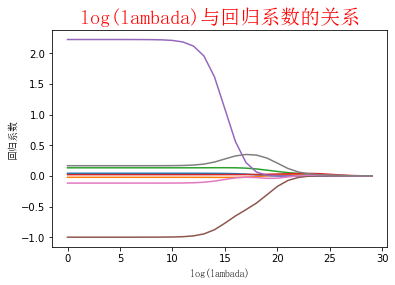

In [6]:
# -*-coding:utf-8 -*-
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
def loadDataSet(fileName):
    """
    函数说明:加载数据
    Parameters:
        fileName - 文件名
    Returns:
        xArr - x数据集
        yArr - y数据集
    """
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr
def ridgeRegres(xMat, yMat, lam = 0.2):
    """
    函数说明:岭回归
    Parameters:
        xMat - x数据集
        yMat - y数据集
        lam - 缩减系数
    Returns:
        ws - 回归系数
    """
    xTx = xMat.T * xMat
    denom = xTx + np.eye(np.shape(xMat)[1]) * lam
    if np.linalg.det(denom) == 0.0:
        print("矩阵为奇异矩阵,不能转置")
        return
    ws = denom.I * (xMat.T * yMat)
    return ws
def ridgeTest(xArr, yArr):
    """
    函数说明:岭回归测试
    Parameters:
        xMat - x数据集
        yMat - y数据集
    Returns:
        wMat - 回归系数矩阵
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    #数据标准化
    yMean = np.mean(yMat, axis = 0)                        #行与行操作，求均值
    yMat = yMat - yMean                                    #数据减去均值
    xMeans = np.mean(xMat, axis = 0)                    #行与行操作，求均值
    xVar = np.var(xMat, axis = 0)                        #行与行操作，求方差
    xMat = (xMat - xMeans) / xVar                        #数据减去均值除以方差实现标准化
    numTestPts = 30                                        #30个不同的lambda测试
    wMat = np.zeros((numTestPts, np.shape(xMat)[1]))    #初始回归系数矩阵
    for i in range(numTestPts):                            #改变lambda计算回归系数
        ws = ridgeRegres(xMat, yMat, np.exp(i - 10))    #lambda以e的指数变化，最初是一个非常小的数，
        wMat[i, :] = ws.T                                 #计算回归系数矩阵
    return wMat
def plotwMat():
    """
    函数说明:绘制岭回归系数矩阵
    """
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    abX, abY = loadDataSet('abalone.txt')
    redgeWeights = ridgeTest(abX, abY)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(redgeWeights)    
    ax_title_text = ax.set_title(u'log(lambada)与回归系数的关系', FontProperties = font)
    ax_xlabel_text = ax.set_xlabel(u'log(lambada)', FontProperties = font)
    ax_ylabel_text = ax.set_ylabel(u'回归系数', FontProperties = font)
    plt.setp(ax_title_text, size = 20, weight = 'bold', color = 'red')
    plt.setp(ax_xlabel_text, size = 10, weight = 'bold', color = 'black')
    plt.setp(ax_ylabel_text, size = 10, weight = 'bold', color = 'black')
    plt.show()
if __name__ == '__main__':
    plotwMat()

图绘制了回归系数与log(λ)的关系。在最左边，即λ最小时，可以得到所有系数的原始值（与线性回归一致）；而在右边，系数全部缩减成0；在中间部分的某个位置，将会得到最好的预测结果。**想要得到最佳的λ参数，可以使用交叉验证的方式获得**，文章的后面会继续讲解。

## 前向逐步线性回归
前向逐步线性回归算法属于一种**贪心算法**，即每一步都尽可能减少误差。我们计算回归系数，不再是通过公式计算，而是通过每次微调各个回归系数，然后计算预测误差。那个使误差最小的一组回归系数，就是我们需要的最佳回归系数。

前向逐步线性回归实现也很简单。当然，还是先进行数据标准化，编写代码如下：

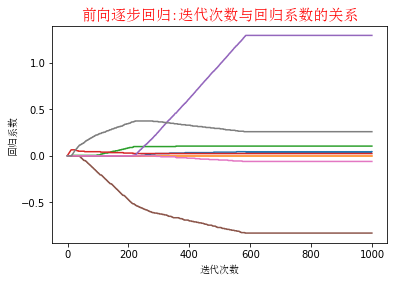

In [7]:
# -*-coding:utf-8 -*-
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
def loadDataSet(fileName):
    """
    函数说明:加载数据
    Parameters:
        fileName - 文件名
    Returns:
        xArr - x数据集
        yArr - y数据集
    """
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr
 
def regularize(xMat, yMat):
    """
    函数说明:数据标准化
    Parameters:
        xMat - x数据集
        yMat - y数据集
    Returns:
        inxMat - 标准化后的x数据集
        inyMat - 标准化后的y数据集
    """    
    inxMat = xMat.copy()                                                        #数据拷贝
    inyMat = yMat.copy()
    yMean = np.mean(yMat, 0)                                                    #行与行操作，求均值
    inyMat = yMat - yMean                                                        #数据减去均值
    inMeans = np.mean(inxMat, 0)                                                   #行与行操作，求均值
    inVar = np.var(inxMat, 0)                                                     #行与行操作，求方差
    inxMat = (inxMat - inMeans) / inVar                                            #数据减去均值除以方差实现标准化
    return inxMat, inyMat
 
def rssError(yArr,yHatArr):
    """
    函数说明:计算平方误差
    Parameters:
        yArr - 预测值
        yHatArr - 真实值
    Returns:
    """
    return ((yArr-yHatArr)**2).sum()
def stageWise(xArr, yArr, eps = 0.01, numIt = 100):
    """
    函数说明:前向逐步线性回归
    Parameters:
        xArr - x输入数据
        yArr - y预测数据
        eps - 每次迭代需要调整的步长
        numIt - 迭代次数
    Returns:
        returnMat - numIt次迭代的回归系数矩阵
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T                                         #数据集
    xMat, yMat = regularize(xMat, yMat)                                                #数据标准化
    m, n = np.shape(xMat)
    returnMat = np.zeros((numIt, n))                                                #初始化numIt次迭代的回归系数矩阵
    ws = np.zeros((n, 1))                                                            #初始化回归系数矩阵
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):                                                            #迭代numIt次
        # print(ws.T)                                                                    #打印当前回归系数矩阵
        lowestError = float('inf');                                                 #正无穷
        for j in range(n):                                                            #遍历每个特征的回归系数
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign                                                #微调回归系数
                yTest = xMat * wsTest                                                #计算预测值
                rssE = rssError(yMat.A, yTest.A)                                    #计算平方误差
                if rssE < lowestError:                                                #如果误差更小，则更新当前的最佳回归系数
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T                                                         #记录numIt次迭代的回归系数矩阵
    return returnMat
def plotstageWiseMat():
    """
    函数说明:绘制岭回归系数矩阵
    """
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    xArr, yArr = loadDataSet('abalone.txt')
    returnMat = stageWise(xArr, yArr, 0.005, 1000)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(returnMat)    
    ax_title_text = ax.set_title(u'前向逐步回归:迭代次数与回归系数的关系', FontProperties = font)
    ax_xlabel_text = ax.set_xlabel(u'迭代次数', FontProperties = font)
    ax_ylabel_text = ax.set_ylabel(u'回归系数', FontProperties = font)
    plt.setp(ax_title_text, size = 15, weight = 'bold', color = 'red')
    plt.setp(ax_xlabel_text, size = 10, weight = 'bold', color = 'black')
    plt.setp(ax_ylabel_text, size = 10, weight = 'bold', color = 'black')
    plt.show()
if __name__ == '__main__':
    plotstageWiseMat()

打印了迭代次数与回归系数的关系曲线。可以看到，有些系数从始至终都是约为0的，这说明它们不对目标造成任何影响，**也就是说这些特征很可能是不需要的**。逐步线性回归算法的**优点**在于它可以帮助人们理解有的模型并做出改进。当构建了一个模型后，可以运行该算法找出重要的特征，这样就有可能及时停止对那些不重要特征的收集。

**总结一下**：
缩减方法（逐步线性回归或岭回归），就是将一些系数缩减成很小的值或者直接缩减为0。这样做，就增大了模型的偏差（减少了一些特征的权重），通过把一些特征的回归系数缩减到0，同时也就减少了模型的复杂度。消除了多余的特征之后，模型更容易理解，同时也降低了预测误差。但是当缩减过于严厉的时候，就会出现过拟合的现象，即用训练集预测结果很好，用测试集预测就糟糕很多。

# 使用Sklearn的linear_model
官方英文文档地址：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
sklearn.linear_model提供了很多线性模型，包括**岭回归、贝叶斯回归、Lasso等**。本文主要讲解岭回归Ridge。![jupyter](./img/reg-2.png)![jupyter](./img/reg-3.png)

In [8]:
# -*-coding:utf-8 -*-
# 需要安装bs4模块。pip install bs4
import numpy as np
from bs4 import BeautifulSoup
import random
 
def scrapePage(retX, retY, inFile, yr, numPce, origPrc):
    """
    函数说明:从页面读取数据，生成retX和retY列表
    Parameters:
        retX - 数据X
        retY - 数据Y
        inFile - HTML文件
        yr - 年份
        numPce - 乐高部件数目
        origPrc - 原价
    Returns:
        无
    """
    # 打开并读取HTML文件
    with open(inFile, encoding='utf-8') as f:
        html = f.read()
    soup = BeautifulSoup(html)
    i = 1
    # 根据HTML页面结构进行解析
    currentRow = soup.find_all('table', r = "%d" % i)
    while(len(currentRow) != 0):
        currentRow = soup.find_all('table', r = "%d" % i)
        title = currentRow[0].find_all('a')[1].text
        lwrTitle = title.lower()
        # 查找是否有全新标签
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1):
            newFlag = 1.0
        else:
            newFlag = 0.0
        # 查找是否已经标志出售，我们只收集已出售的数据
        soldUnicde = currentRow[0].find_all('td')[3].find_all('span')
        if len(soldUnicde) == 0:
            print("商品 #%d 没有出售" % i)
        else:
            # 解析页面获取当前价格
            soldPrice = currentRow[0].find_all('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$','')
            priceStr = priceStr.replace(',','')
            if len(soldPrice) > 1:
                priceStr = priceStr.replace('Free shipping', '')
            sellingPrice = float(priceStr)
            # 去掉不完整的套装价格
            if  sellingPrice > origPrc * 0.5:
                print("%d\t%d\t%d\t%f\t%f" % (yr, numPce, newFlag, origPrc, sellingPrice))
                retX.append([yr, numPce, newFlag, origPrc])
                retY.append(sellingPrice)
        i += 1
        currentRow = soup.find_all('table', r = "%d" % i)
 
def setDataCollect(retX, retY):
    """
    函数说明:依次读取六种乐高套装的数据，并生成数据矩阵
    Parameters:
        无
    Returns:
        无
    """
    scrapePage(retX, retY, './lego/lego8288.html', 2006, 800, 49.99)                #2006年的乐高8288,部件数目800,原价49.99
    scrapePage(retX, retY, './lego/lego10030.html', 2002, 3096, 269.99)                #2002年的乐高10030,部件数目3096,原价269.99
    scrapePage(retX, retY, './lego/lego10179.html', 2007, 5195, 499.99)                #2007年的乐高10179,部件数目5195,原价499.99
    scrapePage(retX, retY, './lego/lego10181.html', 2007, 3428, 199.99)                #2007年的乐高10181,部件数目3428,原价199.99
    scrapePage(retX, retY, './lego/lego10189.html', 2008, 5922, 299.99)                #2008年的乐高10189,部件数目5922,原价299.99
    scrapePage(retX, retY, './lego/lego10196.html', 2009, 3263, 249.99)                #2009年的乐高10196,部件数目3263,原价249.99
 
def usesklearn():
    """
    函数说明:使用sklearn
    Parameters:
        无
    Returns:
        无
    """
    from sklearn import linear_model
    reg = linear_model.Ridge(alpha = .5)
    lgX = []
    lgY = []
    setDataCollect(lgX, lgY)
    reg.fit(lgX, lgY)
    print('%f%+f*年份%+f*部件数量%+f*是否为全新%+f*原价' % (reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3]))    
 
if __name__ == '__main__':
    usesklearn()

2006	800	0	49.990000	85.000000
2006	800	0	49.990000	102.500000
2006	800	0	49.990000	77.000000
商品 #4 没有出售
2006	800	0	49.990000	162.500000
2002	3096	0	269.990000	699.990000
2002	3096	0	269.990000	602.000000
2002	3096	0	269.990000	515.000000
2002	3096	0	269.990000	510.000000
2002	3096	0	269.990000	375.000000
2002	3096	1	269.990000	1050.000000
2002	3096	0	269.990000	740.000000
2002	3096	1	269.990000	759.000000
2002	3096	0	269.990000	730.000000
2002	3096	1	269.990000	750.000000
商品 #11 没有出售
2007	5195	0	499.990000	910.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	811.880000
商品 #4 没有出售
2007	5195	0	499.990000	1324.790000
2007	5195	1	499.990000	850.000000
2007	5195	1	499.990000	800.000000
2007	5195	0	499.990000	810.000000
2007	5195	1	499.990000	1075.000000
2007	5195	0	499.990000	1050.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	1342.310000
2007	5195	1	499.990000	1000.000000
2007	5195	0	499.990000	1780.000000
2007	5195	0	499.990000	750.000000
商品 #16 没有出售
200